# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("Для возможности воспроизведения результатов экспериментов в следующие разы или на другом устройстве.")

Для возможности воспроизведения результатов экспериментов в следующие разы или на другом устройстве.


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [24]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [25]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6973,Tata Nexon 1.5 Revotorq XT,2018,800000,85000,Diesel,Individual,Manual,Second Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2638,Maruti Wagon R VXI,2006,135000,62900,Petrol,Individual,Manual,First Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
4256,Maruti Swift Dzire VDI,2019,675000,25000,Diesel,Individual,Manual,First Owner,28.4 kmpl,1248 CC,74.02 bhp,190Nm@ 2000rpm,5.0
5699,Maruti Swift Dzire ZDI,2018,780000,30000,Diesel,Individual,Manual,First Owner,28.4 kmpl,1248 CC,74.02 bhp,190Nm@ 2000rpm,5.0
2629,Maruti Omni E MPI STD BS IV,2016,190000,80000,Petrol,Individual,Manual,Second Owner,16.8 kmpl,796 CC,34.2 bhp,59Nm@ 2500rpm,8.0
5512,Tata Indica V2 LSi,2008,85000,25000,Petrol,Individual,Manual,Second Owner,16.84 kmpl,1193 CC,64.4 bhp,99.8Nm@ 2700rpm,5.0
4885,Tata Nano Twist XE,2015,110000,15000,Petrol,Individual,Manual,First Owner,25.4 kmpl,624 CC,37.5 bhp,51Nm@ 4000+/-500rpm,4.0
1964,Maruti Omni 8 Seater BSII,2010,130000,120000,Petrol,Individual,Manual,Third Owner,19.7 kmpl,796 CC,35 bhp,6.1kgm@ 3000rpm,8.0
2343,Ford EcoSport 1.5 Ti VCT AT Titanium BSIV,2015,775000,30000,Petrol,Individual,Automatic,First Owner,15.63 kmpl,1499 CC,110.4 bhp,140Nm@ 4400rpm,5.0
5179,Mahindra TUV 300 T8,2017,700000,40000,Diesel,Individual,Manual,First Owner,18.49 kmpl,1493 CC,100 bhp,240Nm@ 1600-2800rpm,7.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [26]:
df_test

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0


In [27]:
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [28]:
df_test.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [29]:
df_train.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [30]:
df_test.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [31]:
df_train.isna().any()

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage           True
engine            True
max_power         True
torque            True
seats             True
dtype: bool

In [32]:
df_test.isna().any()

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage           True
engine            True
max_power         True
torque            True
seats             True
dtype: bool

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [33]:
duplicated_rows = df_train.drop('selling_price', axis = 1).duplicated()
val = 0
for el in duplicated_rows:
    if el:
        val += 1
print(val)

1159


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [34]:
df_train[duplicated_rows]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [35]:
df_train = df_train[~df_train.drop('selling_price', axis = 1).duplicated(keep='first')]
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
6993,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [36]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [37]:
df_train = df_train.reset_index()
df_train

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,6992,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,6993,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [38]:
def get_float_value(value):
    try:
        el = float(value.split()[0])
    except AttributeError:
        return value
    except ValueError:
        return 0
    return el

In [39]:
df_train['mileage'] = df_train['mileage'].apply(get_float_value)
df_train['engine'] = df_train['engine'].apply(get_float_value)
df_train['max_power'] = df_train['max_power'].apply(get_float_value)

In [40]:
df_test['mileage'] = df_test['mileage'].apply(get_float_value)
df_test['engine'] = df_test['engine'].apply(get_float_value)
df_test['max_power'] = df_test['max_power'].apply(get_float_value)

In [41]:
NM_TO_KGM_CONSTANT = 0.10197162129779 #https://www.convertunits.com/from/N-m/to/kg-m

In [42]:
def get_torque(obj):
    
    if obj is np.nan:
        return np.nan
    
    if ' / ' in obj:
        return float(obj.split(' / ')[0]) # one corner case
    
    torque = None
    
    if '@' in obj:
        torque = obj.split('@')[0]
    elif 'at' :
        torque = obj.split('at')[0]
    else:
        return np.nan
    torque = torque.lower() # в некоторых случаях все равно не сделает lowercase, делаем руками
    if '(' in torque:
        return float(torque.split('(')[0].replace('nm', ''))
    try:
        torque = float(torque.replace('nm', '').replace('Nm', '').replace('kgm', ''))
    except ValueError:
        torque = float(torque.replace('Nm', 'nm').split('nm')[0])
    if 'kgm' in obj or 'KGM' in obj:
        torque /= NM_TO_KGM_CONSTANT
    return torque

In [43]:
def get_max_rpm(obj):
    if obj is np.nan:
        return np.nan
    
    if ' / ' in obj:
        return float(obj.split(' / ')[1]) # one corner case
    
    rpm = None
    if '@' in obj:
        try:
            rpm = obj.split('@')[1]
        except IndexError:
            return np.nan
    elif 'at' :
        try:
            rpm = obj.split('at')[1]
        except IndexError:
            return np.nan
    else:
        return np.nan
    rpm = rpm.lower()
    rpm = rpm.replace(',', '').replace('~', '-')
    if '-' in rpm:
        rpm = rpm.split('-')[1]
    if '(' in rpm:
        rpm = rpm.split('(')[0]
    rpm = float(rpm.replace('rpm', ''))
    return rpm

In [44]:
df_train['max_torque_rpm'] = df_train['torque'].apply(get_max_rpm)
df_train['torque'] = df_train['torque'].apply(get_torque)
df_train

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.000000,5.0,2000.0
1,1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.000000,5.0,2500.0
2,2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,219.668960,5.0,2750.0
3,3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,112.776475,5.0,4500.0
4,4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.750000,5.0,4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,6992,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086.0,62.10,96.100000,5.0,3000.0
5836,6993,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,90.000000,5.0,3500.0
5837,6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.700000,5.0,4000.0
5838,6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,235.359600,5.0,2750.0


In [45]:
df_test['max_torque_rpm'] = df_test['torque'].apply(get_max_rpm)
df_test['torque'] = df_test['torque'].apply(get_torque)

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [46]:
df_train.isna().any()

index             False
name              False
year              False
selling_price     False
km_driven         False
fuel              False
seller_type       False
transmission      False
owner             False
mileage            True
engine             True
max_power          True
torque             True
seats              True
max_torque_rpm     True
dtype: bool

In [47]:
df_train['mileage'] = df_train['mileage'].fillna(df_train['mileage'].median())
df_train['engine'] = df_train['engine'].fillna(df_train['engine'].median())
df_train['max_power'] = df_train['max_power'].fillna(df_train['max_power'].median())
df_train['torque'] = df_train['torque'].fillna(df_train['torque'].median())
df_train['seats'] = df_train['seats'].fillna(df_train['seats'].median())
df_train['max_torque_rpm'] = df_train['max_torque_rpm'].fillna(df_train['max_torque_rpm'].median())

In [48]:
df_test['mileage'] = df_test['mileage'].fillna(df_train['mileage'].median())
df_test['engine'] = df_test['engine'].fillna(df_train['engine'].median())
df_test['max_power'] = df_test['max_power'].fillna(df_train['max_power'].median())
df_test['torque'] = df_test['torque'].fillna(df_train['torque'].median())
df_test['seats'] = df_test['seats'].fillna(df_train['seats'].median())
df_test['max_torque_rpm'] = df_test['max_torque_rpm'].fillna(df_train['max_torque_rpm'].median())

In [49]:
df_train.isna().any()

index             False
name              False
year              False
selling_price     False
km_driven         False
fuel              False
seller_type       False
transmission      False
owner             False
mileage           False
engine            False
max_power         False
torque            False
seats             False
max_torque_rpm    False
dtype: bool


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [50]:
print("Потому что в таком случае мы считаем, что при фиксированном весе w_i для целочисленном параметре seats")
print("чем больше мест, тем кратно дороже автомобиль, что вряд ли является таковым. Хочется, чтобы вес у параметра")
print("seats=1 и, например, seats=5 был разным и независсимым, чтобы иметь лучшую обобщающую способность.")

Потому что в таком случае мы считаем, что при фиксированном весе w_i для целочисленном параметре seats
чем больше мест, тем кратно дороже автомобиль, что вряд ли является таковым. Хочется, чтобы вес у параметра
seats=1 и, например, seats=5 был разным и независсимым, чтобы иметь лучшую обобщающую способность.


In [51]:
df_train['engine'] = df_train['engine'].apply(int)
df_train['seats'] = df_train['seats'].apply(int)

In [52]:
df_test['engine'] = df_test['engine'].apply(int)
df_test['seats'] = df_test['seats'].apply(int)

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

In [57]:
df_train = df_train.drop('index', axis=1) # лишний столбец при переписи индексов возник

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

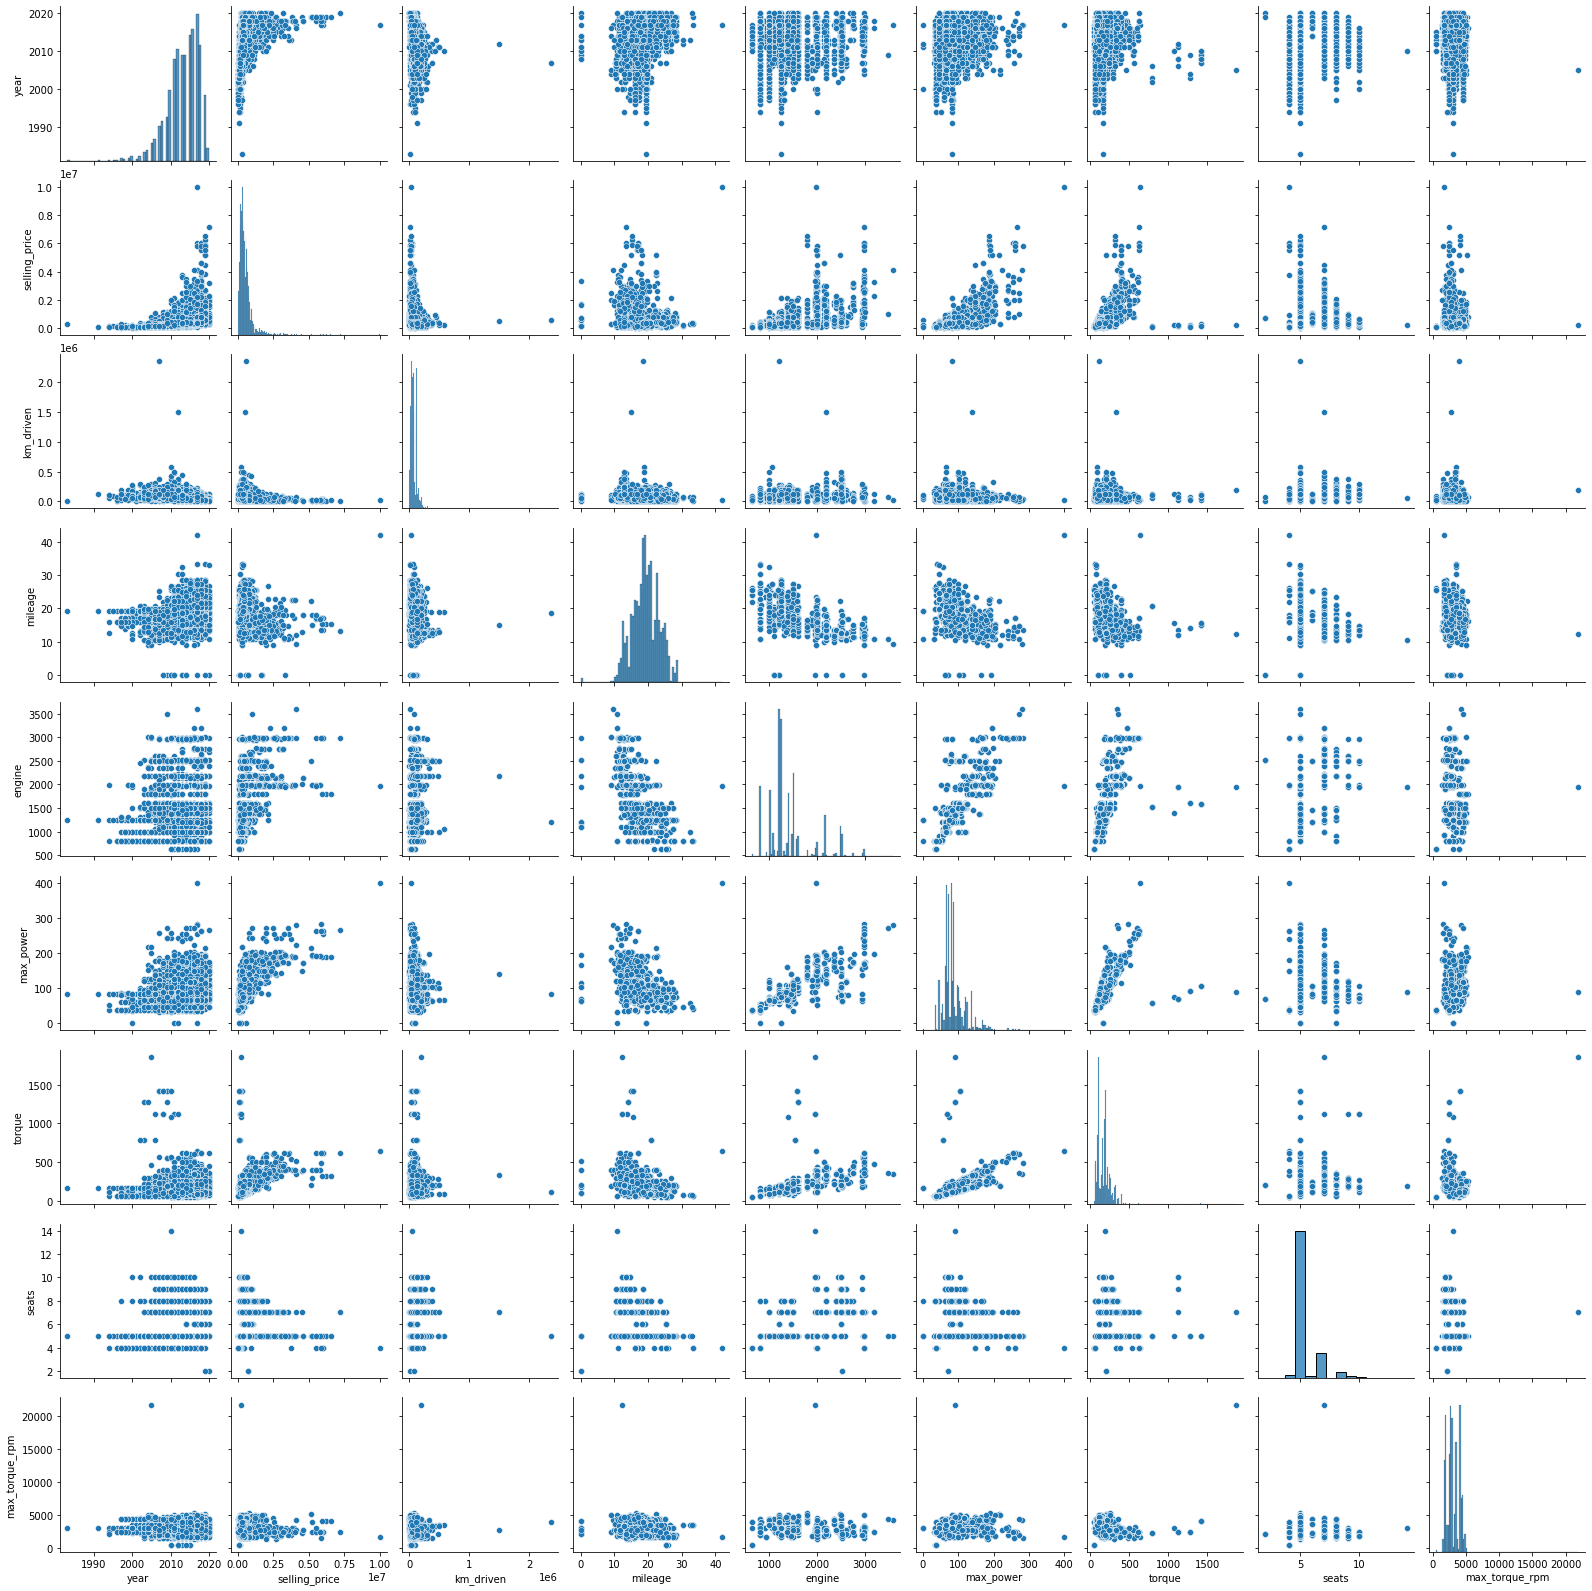

In [58]:
sns.pairplot(df_train)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

Что можно сказать о связи предикторов с целевой переменной? Видна слабая линейная зависсимость между целевой переменной и torque, не зря возился чтобы добавить этот признак. Также сразу видна зависимость между max_power и selling_price. В остальных случаях сказать что-то на глаз сложновато. Можно еще сказать, что чем больше значение переменной year, тем больше цена. Нашел корреляцию между целевой переменной и max_power.

Сильная корреляция между: 
1) engine и max_power

2) engine и torque

3) engine и mileage

4) torque и max_power

Добавляю по мере находения глазами какой-то зависсимости.

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

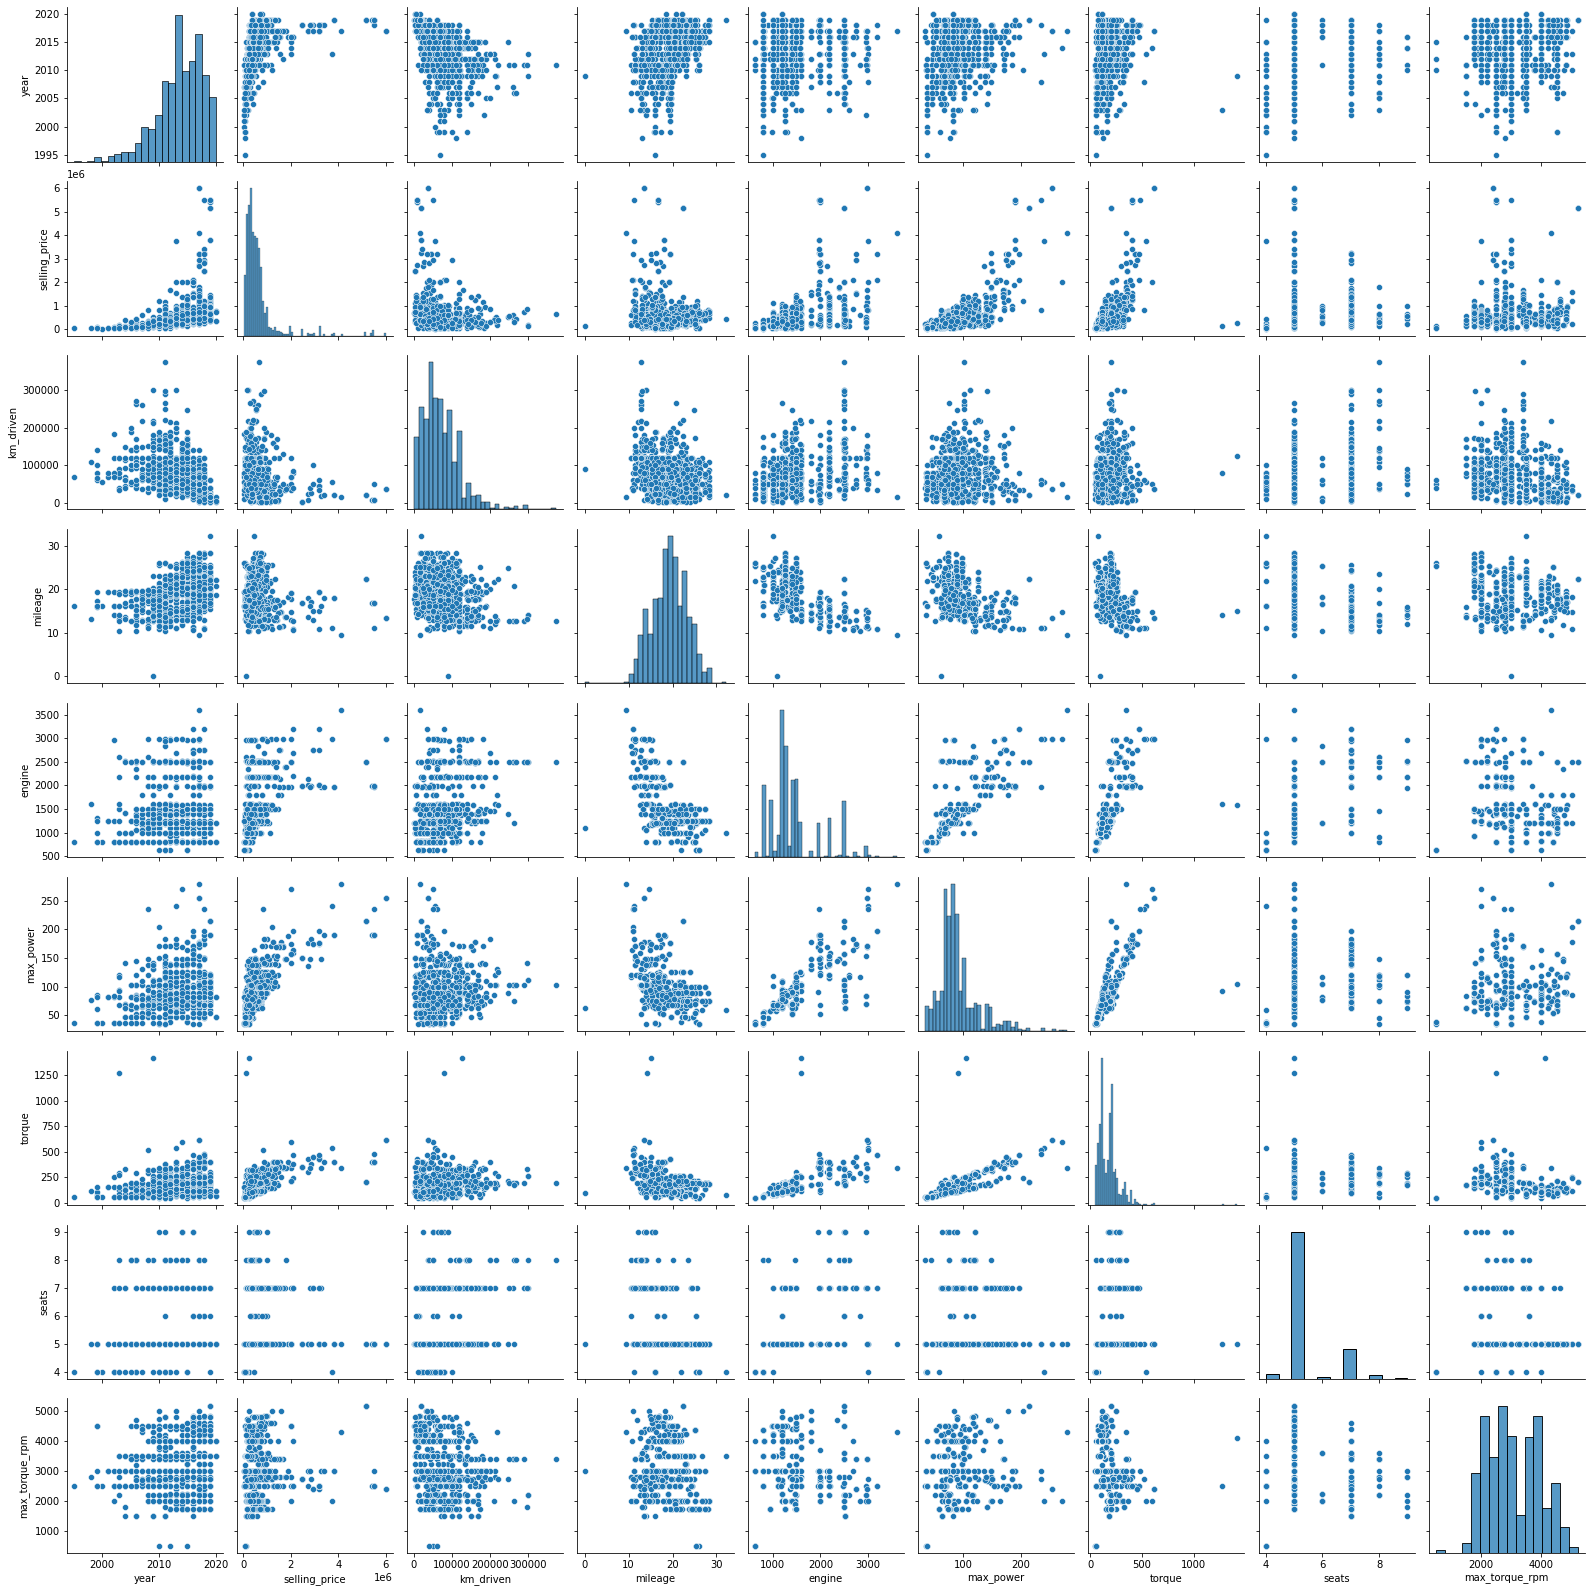

In [54]:
sns.pairplot(df_test)

Смотрю на элементы по диагонали, чтобы видеть распределение значения признка. В целом кажется, что что разделение было достаточно сбалансированным.

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

<AxesSubplot:>

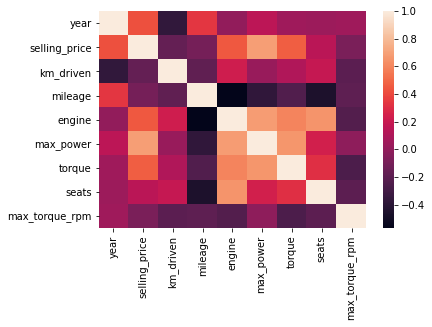

In [64]:
sns.heatmap(df_train.corr())

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

1) Кажется, что между mileage и engine или между year и km_driven

2) selling_price - max_power, selling_price - engine, engine - seats

3) Да, верно. Коэффициент корреляции заметно меньше нуля 

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

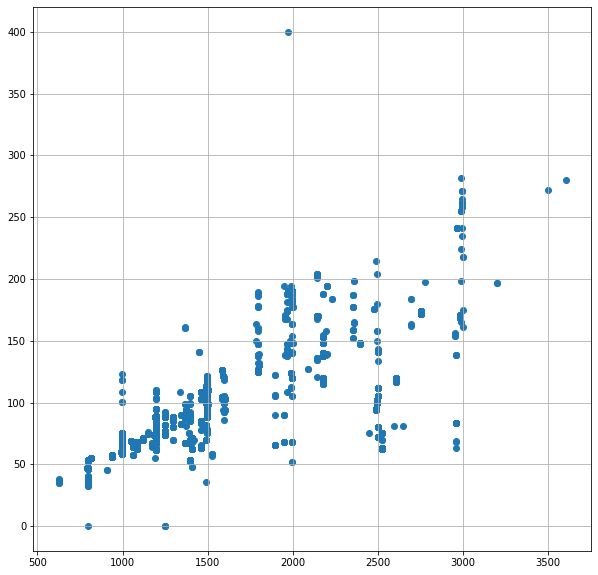

In [70]:
plt.figure(figsize = (10, 10))
plt.grid()
plt.scatter(df_train['engine'], df_train['max_power'])
plt.show()

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [72]:
df_train.describe() # надо посмотреть на параметры распределения признаков после заполнения пропусков и 
# обработки новых фичей

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.430841,1429.448973,87.892354,175.357443,5.426712,3040.138356
std,4.095622,5.354320e+05,6.007114e+04,3.985973,485.662834,31.661223,107.145160,0.982344,916.225706
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,47.071920,2.000000,500.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,111.800000,5.000000,2250.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.370000,1248.000000,81.860000,160.000000,5.000000,3000.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,200.055660,5.000000,4000.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,1863.263500,14.000000,21800.000000


# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [91]:
features = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']

In [92]:
y_train = df_train['selling_price']
X_train = df_train[features]

In [93]:
#assert X_train.shape == (5840, 6) # я обработал столбец torque, потому у меня больше признаков
assert X_train.shape == (5840, 8)

In [94]:
y_test = df_test['selling_price']
X_test = df_test[features]

In [95]:
#assert X_test.shape == (1000, 6) # я обработал столбец torque, потому у меня больше признаков
assert X_test.shape == (1000, 8)

In [96]:
X_train

,year,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
0,2014,145500,23.40,1248,74.00,190.000000,5,2000.0
1,2014,120000,21.14,1498,103.52,250.000000,5,2500.0
2,2010,127000,23.00,1396,90.00,219.668960,5,2750.0
3,2007,120000,16.10,1298,88.20,112.776475,5,4500.0
4,2017,45000,20.14,1197,81.86,113.750000,5,4000.0
...,...,...,...,...,...,...,...,...
5835,2008,191000,17.92,1086,62.10,96.100000,5,3000.0
5836,2013,50000,18.90,998,67.10,90.000000,5,3500.0
5837,2013,110000,18.50,1197,82.85,113.700000,5,4000.0
5838,2007,119000,16.80,1493,110.00,235.359600,5,2750.0


In [97]:
X_test

,year,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
0,2010,168000,14.00,2498,112.00,260.00000,7,2200.0
1,2017,25000,21.50,1497,108.50,260.00000,5,2750.0
2,2007,218463,12.90,1799,130.00,172.00000,5,4300.0
3,2015,173000,25.10,1498,98.60,200.00000,5,1750.0
4,2011,70000,16.50,1172,65.00,96.00000,5,3000.0
...,...,...,...,...,...,...,...,...
995,2008,100000,19.81,1086,68.05,99.04000,5,4500.0
996,2017,50000,18.60,1197,81.83,114.70000,5,4000.0
997,2009,40000,23.00,1396,90.00,219.66896,5,2750.0
998,2012,25000,20.36,1197,78.90,111.80000,5,4000.0


(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print(r2_score(y_test, pred))
print(MSE(y_test, pred))

0.6002517021563254
229786736668.40616


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [99]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [101]:
X_train_scaled, X_test_scaled

(array([[ 0.13956959,  1.19115249,  0.995867  , ...,  0.13667263,
         -0.43441899, -1.1353397 ],
        [ 0.13956959,  0.76661943,  0.42883018, ...,  0.69670855,
         -0.43441899, -0.58957591],
        [-0.83716668,  0.88315792,  0.8955065 , ...,  0.41360068,
         -0.43441899, -0.31669402],
        ...,
        [-0.10461448,  0.60013588, -0.2335491 , ..., -0.57550637,
         -0.43441899,  1.04771546],
        [-1.56971888,  0.74997108, -0.66008122, ...,  0.56005605,
         -0.43441899, -0.31669402],
        [-1.08135075,  0.76661943, -0.03282811, ...,  0.13667263,
         -0.43441899, -1.1353397 ]]),
 array([[-0.83716668,  1.56574049, -1.3626047 , ...,  0.79004786,
          1.60170212, -0.91703419],
        [ 0.8721218 , -0.81497433,  0.51915463, ...,  0.79004786,
         -0.43441899, -0.31669402],
        [-1.56971888,  2.40586644, -1.63859607, ..., -0.03133814,
         -0.43441899,  1.37517373],
        ...,
        [-1.08135075, -0.565249  ,  0.8955065 , ...,  

In [89]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
pred = model.predict(X_test_scaled)

print(r2_score(y_test, pred))
print(MSE(y_test, pred))

0.6002517021563246
229786736668.4066


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [102]:
model.coef_

array([ 4.04199461e+04, -8.14267313e-01, -2.34162273e+03,  4.42822572e+01,
        1.03819451e+04,  8.01551367e+01, -2.99737628e+04, -6.44253568e+01])

Признак year

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [103]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train_scaled, y_train)
pred = model.predict(X_test_scaled)

print(r2_score(y_test, pred))
print(MSE(y_test, pred))

0.6002504113904017
229787478637.51776


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [104]:
model.coef_

array([165528.43721311, -48908.8371522 ,  -9329.55581421,  21502.37233111,
       328678.34854676,   8586.850135  , -29438.03845869, -59021.03698864])

Нет, так как параметр по умолчанию маловат, поднимем его.

In [114]:
model = Lasso(3000)
model.fit(X_train_scaled, y_train)
pred = model.predict(X_test_scaled)

print(r2_score(y_test, pred))
print(MSE(y_test, pred))

0.5962018133796005
232114728384.4272


In [115]:
model.coef_

array([159063.65356796, -46119.42855568,     -0.        ,  15358.50282551,
       332746.07947512,   6699.33742344, -17693.69084207, -52944.4106826 ])

Ну вот, начинает занулять.

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [121]:
from sklearn.model_selection import GridSearchCV

parameters = {'alpha': np.linspace(1, 1000, 50)}
model = Lasso()

clf = GridSearchCV(model, parameters, verbose = 1)
clf.fit(X_train_scaled, y_train)

pred = clf.predict(X_test_scaled)

print(r2_score(y_test, pred))
print(MSE(y_test, pred))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.5989349270063913
230543656625.9434


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.7s finished


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

параметры cv * число комбинаций параметров из сетки. В данном случае - 5 * 50 = 250

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [119]:
clf.best_estimator_

Lasso(alpha=1000.0)

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [123]:
from sklearn.linear_model import ElasticNet

model = ElasticNet()
parameters = {'alpha' : np.linspace(1, 10000, 5), 'l1_ratio':np.linspace(0, 1, 5)}

clf = GridSearchCV(model, parameters, cv = 10, verbose = 1)
clf.fit(X_train_scaled, y_train)

pred = clf.predict(X_test_scaled)

print(r2_score(y_test, pred))
print(MSE(y_test, pred))

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/caesium/Programming/AnacondaFolder/anaconda3/envs/work/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 393241746272186.7, tolerance: 124693338888.66316
  model = cd_fast.enet_coordinate_descent(
/Users/caesium/Programming/AnacondaFolder/anaconda3/envs/work/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 492071299951802.94, tolerance: 156431196096.99866
  model = cd_fast.enet_coordinate_descent(
/Users/caesium/Programming/AnacondaFolder/anaconda3/envs/work/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of 

/Users/caesium/Programming/AnacondaFolder/anaconda3/envs/work/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 739213176833347.0, tolerance: 147875597635.32138
  model = cd_fast.enet_coordinate_descent(
/Users/caesium/Programming/AnacondaFolder/anaconda3/envs/work/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 732263645675200.9, tolerance: 146487814369.9769
  model = cd_fast.enet_coordinate_descent(
/Users/caesium/Programming/AnacondaFolder/anaconda3/envs/work/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 774949039072594.2, tolerance: 155024925826.19598
  model =

0.5866569522465828
237601387123.28934


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    3.3s finished


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [124]:
clf.best_estimator_

ElasticNet(alpha=10000.0, l1_ratio=1.0)

Предлагаем вам оставить попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [128]:
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.000000,5,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.000000,5,2500.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,219.668960,5,2750.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,112.776475,5,4500.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,113.750000,5,4000.0


In [160]:
X_train_cat = df_train.drop(['selling_price', 'name'], axis = 1)
X_train_cat

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.000000,5,2000.0
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.000000,5,2500.0
2,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,219.668960,5,2750.0
3,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,112.776475,5,4500.0
4,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,113.750000,5,4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5835,2008,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,96.100000,5,3000.0
5836,2013,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,90.000000,5,3500.0
5837,2013,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,113.700000,5,4000.0
5838,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,235.359600,5,2750.0


In [161]:
X_test_cat = df_test.drop(['selling_price', 'name'], axis = 1)

In [162]:
#assert X_train_cat.shape == (5840, 10) # ранее закодировал torque, потому на две больше
assert X_train_cat.shape == (5840, 12)

In [163]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [164]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

from sklearn.compose import make_column_transformer

transformer  = make_column_transformer((OneHotEncoder(), ['fuel', 'seller_type', 'transmission', 'owner', 'seats']),remainder='passthrough')
transformed = transformer.fit_transform(X_train_cat)
test_transformed = transformer.transform(X_test_cat)

In [165]:
X_train_cat = pd.DataFrame(transformed, columns=transformer.get_feature_names())
X_train_cat

,onehotencoder__x0_CNG,onehotencoder__x0_Diesel,onehotencoder__x0_LPG,onehotencoder__x0_Petrol,onehotencoder__x1_Dealer,onehotencoder__x1_Individual,onehotencoder__x1_Trustmark Dealer,onehotencoder__x2_Automatic,onehotencoder__x2_Manual,onehotencoder__x3_First Owner,...,onehotencoder__x4_9,onehotencoder__x4_10,onehotencoder__x4_14,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,2014.0,145500.0,23.40,1248.0,74.00,190.000000,2000.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,2014.0,120000.0,21.14,1498.0,103.52,250.000000,2500.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,2010.0,127000.0,23.00,1396.0,90.00,219.668960,2750.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,2007.0,120000.0,16.10,1298.0,88.20,112.776475,4500.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,2017.0,45000.0,20.14,1197.0,81.86,113.750000,4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,2008.0,191000.0,17.92,1086.0,62.10,96.100000,3000.0
5836,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,2013.0,50000.0,18.90,998.0,67.10,90.000000,3500.0
5837,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,2013.0,110000.0,18.50,1197.0,82.85,113.700000,4000.0
5838,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,2007.0,119000.0,16.80,1493.0,110.00,235.359600,2750.0


In [166]:
X_test_cat = pd.DataFrame(test_transformed, columns=transformer.get_feature_names())

In [154]:
X_train_cat.columns

Index(['onehotencoder__x0_CNG', 'onehotencoder__x0_Diesel',
       'onehotencoder__x0_LPG', 'onehotencoder__x0_Petrol',
       'onehotencoder__x1_Dealer', 'onehotencoder__x1_Individual',
       'onehotencoder__x1_Trustmark Dealer', 'onehotencoder__x2_Automatic',
       'onehotencoder__x2_Manual', 'onehotencoder__x3_First Owner',
       'onehotencoder__x3_Fourth & Above Owner',
       'onehotencoder__x3_Second Owner', 'onehotencoder__x3_Test Drive Car',
       'onehotencoder__x3_Third Owner', 'onehotencoder__x4_2',
       'onehotencoder__x4_4', 'onehotencoder__x4_5', 'onehotencoder__x4_6',
       'onehotencoder__x4_7', 'onehotencoder__x4_8', 'onehotencoder__x4_9',
       'onehotencoder__x4_10', 'onehotencoder__x4_14', 'year', 'km_driven',
       'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm'],
      dtype='object')

In [155]:
delete_columns = ['onehotencoder__x0_CNG', 'onehotencoder__x1_Trustmark Dealer'
                  , 'onehotencoder__x2_Manual', 'onehotencoder__x3_Fourth & Above Owner',
                  'onehotencoder__x4_14'
                 ]

for el in delete_columns:
    X_train_cat = X_train_cat.drop(el)
    X_test_cat = X_test_cat.drop(el)

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [174]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

model = Ridge()
parameters = {'alpha':np.linspace(1, 10000, 10)}

#scaler = StandardScaler()
#scaler.fit(X_train_cat)

#X_train_cat = scaler.transform(X_train_cat)
#X_test_cat = scaler.transform(X_test_cat) # можно и отшкалировать признаки, не уверен, надо ли это тут

clf = GridSearchCV(model, parameters, verbose = 1, cv = 10, scoring = make_scorer(r2_score))
clf.fit(X_train_cat, y_train)
pred = clf.predict(X_test_cat)

print(r2_score(y_test, pred))
print(MSE(y_test, pred))

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.6380812263591014
208041245910.43488


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [175]:
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.000000,5,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.000000,5,2500.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,219.668960,5,2750.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,112.776475,5,4500.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,113.750000,5,4000.0


In [176]:
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0,2498,112.0,260.0,7,2200.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5,1497,108.5,260.0,5,2750.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9,1799,130.0,172.0,5,4300.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1,1498,98.6,200.0,5,1750.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5,1172,65.0,96.0,5,3000.0


In [178]:
df_train['name'] = df_train['name'].apply(lambda x: x.split()[0])
df_test['name'] = df_test['name'].apply(lambda x: x.split()[0])

In [196]:
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.000000,5,2000.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.000000,5,2500.0
2,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,219.668960,5,2750.0
3,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,112.776475,5,4500.0
4,Hyundai,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,113.750000,5,4000.0


In [281]:
X_train = df_train.drop('selling_price', axis = 1)
X_test = df_test.drop('selling_price', axis = 1)

y_train = df_train['selling_price']
y_test = df_test['selling_price']

In [282]:
transformer  = make_column_transformer((OneHotEncoder(handle_unknown='ignore'), ['name','fuel', 'seller_type', 'transmission', 'owner', 'seats']),remainder='passthrough')
transformed = transformer.fit_transform(X_train)
test_transformed = transformer.transform(X_test)

In [283]:
X_train = pd.DataFrame(transformed.toarray(), columns=transformer.get_feature_names())
X_test = pd.DataFrame(test_transformed.toarray(), columns=transformer.get_feature_names())

In [284]:
X_train.head()

,onehotencoder__x0_Ambassador,onehotencoder__x0_Audi,onehotencoder__x0_BMW,onehotencoder__x0_Chevrolet,onehotencoder__x0_Daewoo,onehotencoder__x0_Datsun,onehotencoder__x0_Fiat,onehotencoder__x0_Force,onehotencoder__x0_Ford,onehotencoder__x0_Honda,...,onehotencoder__x5_9,onehotencoder__x5_10,onehotencoder__x5_14,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2014.0,145500.0,23.40,1248.0,74.00,190.000000,2000.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2014.0,120000.0,21.14,1498.0,103.52,250.000000,2500.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2010.0,127000.0,23.00,1396.0,90.00,219.668960,2750.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2007.0,120000.0,16.10,1298.0,88.20,112.776475,4500.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2017.0,45000.0,20.14,1197.0,81.86,113.750000,4000.0


In [285]:
print(X_train.isna().any().any())
print(X_test.isna().any().any())

False
False


In [286]:
generated_features_from = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm']
for i in range(len(generated_features_from)):
    for j in range(len(generated_features_from)):
        a1 = generated_features_from[i]
        a2 = generated_features_from[j]
        if i<=j:
            X_train[a1+'_mult_'+a2] = X_train[a1] * X_train[a2]
            X_test[a1+'_mult_'+a2] = X_test[a1] * X_test[a2]

In [291]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [292]:
model = Lasso(1000)
model.fit(X_train, y_train)

/Users/caesium/Programming/AnacondaFolder/anaconda3/envs/work/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 194287403704.59375, tolerance: 167396789601.0057
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1000)

In [293]:
pred = model.predict(X_test)

In [294]:
print(r2_score(y_test, pred))
print(MSE(y_test, pred))

0.8231271988651438
101671536808.07515


# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [295]:
def business_metrics(y_true, y_pred):
    assert len(y_true) == len(y_pred)
    
    val = 0
    for i in range(len(y_true)):
        if abs(100 * y_pred[i] / float(y_true[i]) - 100) <= 10:
            val += 1
            
    return float(val) / len(y_true)

business_metrics(y_test, pred)

0.324

In [296]:
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

# Cделаем простую модель для апи

In [342]:
train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')


In [343]:
model = LinearRegression()

In [344]:
train['mileage'] = train['mileage'].apply(get_float_value)
train['engine'] = train['engine'].apply(get_float_value)
train['max_power'] = train['max_power'].apply(get_float_value)

In [345]:
columns_for_train = ['year', 'km_driven', 'mileage', 'engine', 'max_power']

In [346]:
train = train.dropna()
y = train['selling_price']
train = train.drop('selling_price', axis = 1)

In [347]:
train = train[columns_for_train]

In [348]:
train

,year,km_driven,mileage,engine,max_power
0,2014,145500,23.40,1248.0,74.00
1,2014,120000,21.14,1498.0,103.52
2,2010,127000,23.00,1396.0,90.00
3,2007,120000,16.10,1298.0,88.20
4,2017,45000,20.14,1197.0,81.86
...,...,...,...,...,...
6994,2013,110000,18.50,1197.0,82.85
6995,2007,119000,16.80,1493.0,110.00
6996,2009,120000,19.30,1248.0,73.90
6997,2013,25000,23.57,1396.0,70.00


In [349]:
model.fit(train[columns_for_train], y)

LinearRegression()

In [351]:
with open("model_for_api.pkl", "wb") as f:
    pickle.dump(model, f)

# Часть 5 (3 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [350]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link